In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(16,8)})
sns.set()


import sys
import os
sys.path.append("../src/")
from qite import *


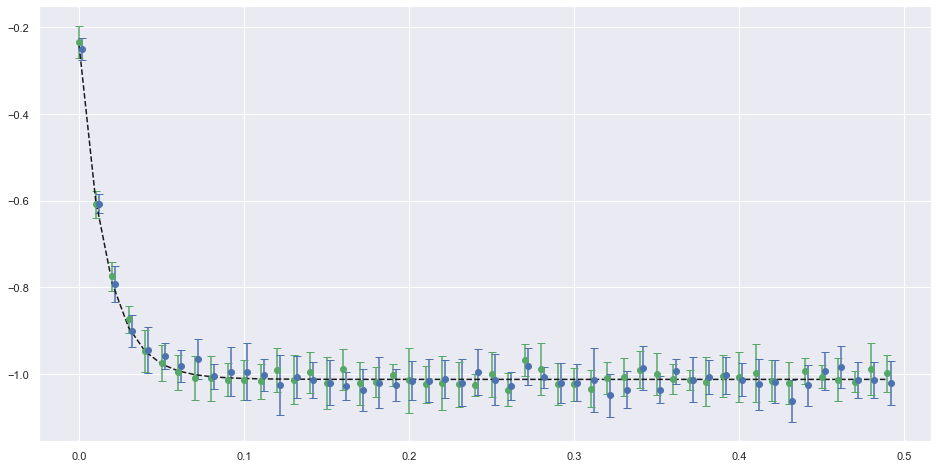

In [17]:
results_filename='../qite_results_Nmax02_N4LOsrg1.5_graycode_qasm.npy'
averages_qasm,stdevs_qasm=analyze_qite_results(results_filename)
results_filename='../qite_results_Nmax02_N4LOsrg1.5_graycode_statevector.npy'
averages_sv,_=analyze_qite_results(results_filename)

results_filename="../qite_results_Nmax02_N4LOsrg1.5_graycode_qasm_ms1.npy"
averages_qasm_m1,stdevs_qasm_m1=analyze_qite_results(results_filename)

time=[0.01*t for t in range(len(averages))]
time_shifted=[0.01*t+.002 for t in range(len(averages))]
plt.errorbar(time, averages_qasm, yerr=stdevs_qasm, capsize=4, fmt='go')
plt.errorbar(time_shifted, averages_qasm_m1, yerr=stdevs_qasm_m1, capsize=4, fmt='bo')
plt.plot(time,averages_sv,"k--")

In [25]:
print(np.mean(stdevs_qasm))
print(np.mean(stdevs_qasm_m1))

0.044473954629621074
0.04485952537377202


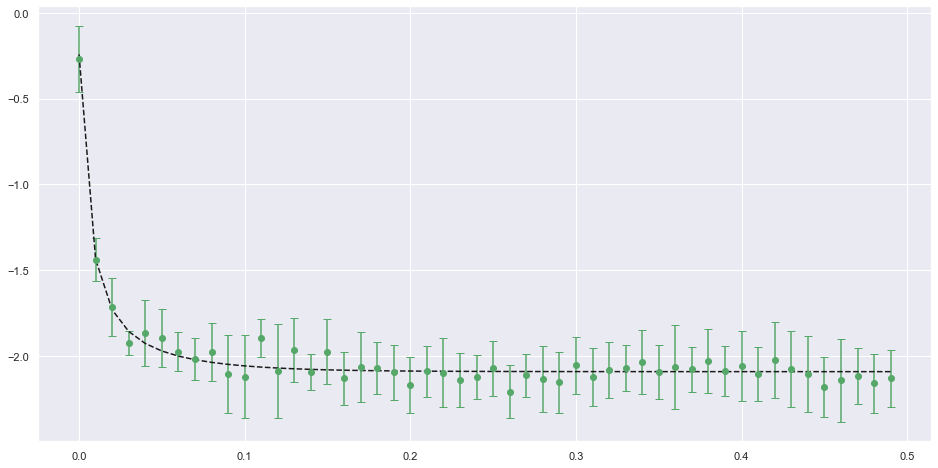

In [29]:
results_filename="../qite_results_Nmax06_N4LOsrg1.5_graycode_qasm_ms1.npy"
averages_qasm_Nmax6_m1,stdevs_qasm_Nmax6_m1=analyze_qite_results(results_filename)
time=[0.01*t for t in range(len(averages))]

results_filename="../qite_results_Nmax06_N4LOsrg1.5_graycode_statevector_ms1.npy"
averages_sv_Nmax6_m1,_=analyze_qite_results(results_filename)


plt.errorbar(time, averages_qasm_Nmax6_m1, yerr=stdevs_qasm_Nmax6_m1, capsize=4, fmt='go')
plt.plot(time,averages_sv_Nmax6_m1,"k--")